<div align="center"> 
    <hr>
  <font size="6"><b>Dev | CCER with Tf-Idf</b> </font>
   <hr>
</div>

In [1]:
!python --version

Python 3.9.16


In [2]:
import os
import sys
import pandas as pd
import networkx
import random
from networkx import draw, Graph
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation
from pyjedai.datamodel import Data
d1 = pd.read_csv("../data/ccer/D2/abt.csv", sep='|', engine='python')
d2 = pd.read_csv("../data/ccer/D2/buy.csv", sep='|', engine='python')
gt = pd.read_csv("../data/ccer/D2/gt.csv", sep='|', engine='python')

data = Data(
    dataset_1=d1,
    id_column_name_1='id',
    dataset_2=d2,
    id_column_name_2='id',
    ground_truth=gt
)

[nltk_data] Downloading package stopwords to /home/jm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Simple workflow

In [3]:
from pyjedai.block_building import StandardBlocking
from pyjedai.block_cleaning import BlockFiltering
from pyjedai.block_cleaning import BlockPurging
from pyjedai.comparison_cleaning import WeightedEdgePruning, WeightedNodePruning, CardinalityEdgePruning, CardinalityNodePruning
from pyjedai.matching import EntityMatching

sb = StandardBlocking()
blocks = sb.build_blocks(data)
sb.evaluate(blocks, with_classification_report=True)

cbbp = BlockPurging()
blocks = cbbp.process(blocks, data, tqdm_disable=False)
cbbp.evaluate(blocks, with_classification_report=True)

bf = BlockFiltering(ratio=0.8)
blocks = bf.process(blocks, data, tqdm_disable=False)

wep = CardinalityEdgePruning(weighting_scheme='X2')
candidate_pairs_blocks = wep.process(blocks, data)
wep.evaluate(candidate_pairs_blocks, with_classification_report=True)

/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Standard Blocking: 100%|██████████| 2152/2152 [00:00<00:00, 20921.60it/s]


***************************************************************************************************************************
                                         Μethod:  Standard Blocking
***************************************************************************************************************************
Method name: Standard Blocking
Parameters: 
Runtime: 0.1038 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.11% 
	Recall:        99.81%
	F1-score:       0.23%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1074
	False positives: 948081
	True negatives: 1156698
	False negatives: 2
	Total comparisons: 949155
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Block Purging: 100%|██████████| 4264/4264 [00:00<00:00, 795079.23it/s]


***************************************************************************************************************************
                                         Μethod:  Block Purging
***************************************************************************************************************************
Method name: Block Purging
Parameters: 
	Smoothing factor: 1.025
	Max Comparisons per Block: 13920.0
Runtime: 0.0072 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.25% 
	Recall:        99.81%
	F1-score:       0.49%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1074
	False positives: 436832
	True negatives: 1156698
	False negatives: 2
	Total comparisons: 437906
──────────────────────────────────────────────────────────────────────────────────────────

Cardinality Edge Pruning: 100%|██████████| 1076/1076 [00:01<00:00, 978.47it/s]

***************************************************************************************************************************
                                         Μethod:  Cardinality Edge Pruning
***************************************************************************************************************************
Method name: Cardinality Edge Pruning
Parameters: 
	Node centric: False
	Weighting scheme: X2
Runtime: 1.1005 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
───────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 7.32114352053403,
 'Recall %': 93.77323420074349,
 'F1 %': 13.581908736034462,
 'True Positives': 1009,
 'False Positives': 12773,
 'True Negatives': 1156633,
 'False Negatives': 67}

In [4]:
met = ['dice', 'jaccard', 'cosine']
tokenizers = ['word_tokenizer', 'char_tokenizer', 'white_space_tokenizer'] 
vectorizers = ['tfidf', 'tf', 'boolean']
random.shuffle(met)
            
for m in met:
    for vectorizer in vectorizers:
        for tokenizer in tokenizers:
            for qgram in range(1,6):
                print(f"\n\nMetric: {m}, Tokenizer: {tokenizer}, Vectorizer: {vectorizer}\n")
                EM = EntityMatching(metric=m, 
                                    tokenizer=tokenizer,
                                    vectorizer=vectorizer,
                                    qgram=qgram,
                                    similarity_threshold=0.0)
                pairs_graph = EM.predict(candidate_pairs_blocks, data)
                EM.evaluate(pairs_graph, with_classification_report=True)



Metric: dice, Tokenizer: word_tokenizer, Vectorizer: tfidf



Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 322.12it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 3.3318 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
────────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 81.95it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 13.0942 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
────────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 62.84it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 17.0770 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
─────────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 57.62it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 18.6231 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
─────────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 55.80it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 19.2295 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
───────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 10532.02it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 0.1028 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1333.29it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 0.8057 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:05<00:00, 184.96it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 5.8023 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 62.24it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 17.2398 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
───────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:32<00:00, 32.82it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 32.6955 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
───────────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 309.76it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 3.4649 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
─────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:12<00:00, 83.05it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 12.9207 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
─────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:16<00:00, 63.78it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 16.8240 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
──────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 58.02it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 18.4931 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
──────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 55.97it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 19.1727 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 321.58it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 3.3376 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
───────────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 82.52it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 13.0035 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
───────────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:16<00:00, 63.41it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 16.9216 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
────────────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 57.64it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 18.6180 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
────────────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 55.62it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 19.2937 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
──────────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 9977.58it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 0.1082 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
───────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1330.59it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 0.8069 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
───────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:05<00:00, 186.95it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 5.7401 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
───────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 62.58it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 17.1466 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
──────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:32<00:00, 33.31it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 32.2143 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
──────────────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 313.26it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 3.4261 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
────────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 80.36it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 13.3524 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
────────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 61.21it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 17.5314 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
─────────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 56.07it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 19.1379 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
─────────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 54.14it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 19.8184 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
───────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 313.15it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 3.4275 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
──────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 80.37it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 13.3513 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
──────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 61.78it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 17.3675 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
───────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 56.82it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 18.8847 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
───────────────────────────────

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 54.22it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 19.7895 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
─────────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 10198.07it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 0.1062 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
──────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1291.57it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 0.8317 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
──────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:06<00:00, 177.07it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 6.0607 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
──────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 60.19it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 17.8267 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
─────────────────────────────

Entity Matching (dice, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, char_tokenizer): 100%|██████████| 1073/1073 [00:32<00:00, 32.83it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 32.6891 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
─────────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 308.91it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 3.4743 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
───────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 81.53it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 13.1608 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
───────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 63.11it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 17.0028 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 57.06it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 18.8050 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
────────────────────────

Entity Matching (dice, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, white_space_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 53.71it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 19.9794 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
──────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 5597.52it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 0.1926 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
──────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1850.32it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 0.5810 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
───────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1543.85it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 0.6955 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
────────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1464.65it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 0.7331 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
────────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1371.29it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 0.7830 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
──────────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 12120.11it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 0.0889 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
──────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 6458.18it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 0.1667 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
──────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 2437.76it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 0.4405 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
──────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1344.85it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 0.7983 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
──────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:01<00:00, 715.83it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 1.4999 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
──────────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 4968.81it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 0.2168 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
───────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1940.77it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 0.5534 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1541.52it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 0.6966 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
─────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1361.47it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 0.7888 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
─────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1250.94it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 0.8585 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
───────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 5252.95it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 0.2050 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
─────────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1812.16it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 0.5929 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
──────────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1420.66it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 0.7559 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
───────────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1240.75it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 0.8656 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
───────────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1298.22it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 0.8274 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
─────────────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 12736.31it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 0.0849 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
─────────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 6268.04it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 0.1719 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
─────────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 2758.15it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 0.3895 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
─────────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1116.39it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 0.9616 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
─────────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:01<00:00, 645.60it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 1.6625 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
─────────────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 5116.74it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 0.2103 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
──────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1779.44it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 0.5962 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
───────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1358.75it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 0.7909 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
────────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1230.48it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 0.8729 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
────────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1383.56it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 0.7763 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
──────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 5113.21it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 0.2107 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1763.93it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 0.6089 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
─────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1476.28it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 0.7275 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
──────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1080.11it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 0.9941 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
──────────────────────────────

Entity Matching (cosine, word_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1408.40it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 0.7625 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
────────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 9733.56it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 0.1110 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 6777.06it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 0.1589 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 2852.38it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 0.3767 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1318.72it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 0.8141 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
────────────────────────────

Entity Matching (cosine, char_tokenizer): 100%|██████████| 1073/1073 [00:01<00:00, 721.10it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 1.4885 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
────────────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 5228.12it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 0.2037 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
─────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1682.51it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 0.6384 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
──────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1296.35it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 0.8284 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
───────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1204.09it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 0.8917 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
───────────────────────

Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1322.04it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 0.8121 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
─────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 314.80it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 3.4090 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
─────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 80.65it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 13.3063 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
─────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 61.68it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 17.3957 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
──────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 55.35it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 19.3860 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
──────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:20<00:00, 53.47it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 20.0667 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
────────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 10337.11it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 0.1045 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
─────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1295.92it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 0.8293 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
─────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:06<00:00, 177.53it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 6.0447 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
─────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 59.38it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 18.0716 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:33<00:00, 32.25it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 33.2767 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
────────────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 312.54it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 3.4339 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
──────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 79.51it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 2
Runtime: 13.4953 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
──────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 60.96it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 3
Runtime: 17.6020 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
───────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 54.58it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 4
Runtime: 19.6610 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
───────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:20<00:00, 53.37it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tfidf
	Qgrams: 5
Runtime: 20.1060 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
─────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 302.57it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 3.5470 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
────────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 80.16it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 13.3871 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
────────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 61.23it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 17.5242 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
─────────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 55.21it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 19.4373 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
─────────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:20<00:00, 53.39it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 20.0997 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
───────────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 10431.68it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 0.1036 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1295.87it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 0.8287 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:06<00:00, 177.93it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 6.0310 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
────────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 59.82it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 17.9392 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
───────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:33<00:00, 32.12it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 33.4060 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
───────────────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 301.44it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 1
Runtime: 3.5602 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
─────────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 82.14it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 2
Runtime: 13.0639 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
─────────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:16<00:00, 63.14it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 3
Runtime: 16.9944 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
──────────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 57.26it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 4
Runtime: 18.7388 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
──────────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 55.25it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: tf
	Qgrams: 5
Runtime: 19.4230 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 321.75it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 3.3356 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
───────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 82.09it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 13.0710 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
───────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:16<00:00, 64.34it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 16.6775 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 57.51it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 18.6598 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
────────────────────────────

Entity Matching (jaccard, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, word_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 55.40it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 19.3684 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
──────────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 10560.19it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 0.1024 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
───────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:00<00:00, 1325.84it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 0.8108 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
───────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:05<00:00, 184.05it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 5.8308 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12773
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13782
───────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 62.02it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 17.3013 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.33% 
	Recall:        93.77%
	F1-score:      13.59%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12764
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13773
──────────────────────────

Entity Matching (jaccard, char_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, char_tokenizer): 100%|██████████| 1073/1073 [00:32<00:00, 33.35it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 32.1703 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.35% 
	Recall:        93.77%
	F1-score:      13.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12725
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13734
──────────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 326.42it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 1
Runtime: 3.2880 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1009
	False positives: 12772
	True negatives: 1156633
	False negatives: 67
	Total comparisons: 13781
────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:13<00:00, 80.77it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 2
Runtime: 13.2851 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      8.54% 
	Recall:        83.92%
	F1-score:      15.50%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 903
	False positives: 9669
	True negatives: 1156527
	False negatives: 173
	Total comparisons: 10572
────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:17<00:00, 61.88it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 3
Runtime: 17.3412 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     13.68% 
	Recall:        54.37%
	F1-score:      21.86%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 585
	False positives: 3692
	True negatives: 1156209
	False negatives: 491
	Total comparisons: 4277
─────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:18<00:00, 57.93it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 4
Runtime: 18.5222 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     23.36% 
	Recall:        29.18%
	F1-score:      25.95%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 314
	False positives: 1030
	True negatives: 1155938
	False negatives: 762
	Total comparisons: 1344
─────────────────────

Entity Matching (jaccard, white_space_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 1073/1073 [00:19<00:00, 54.54it/s]

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: boolean
	Qgrams: 5
Runtime: 19.6753 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     32.86% 
	Recall:        12.92%
	F1-score:      18.55%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 139
	False positives: 284
	True negatives: 1155763
	False negatives: 937
	Total comparisons: 423
───────────────────────

In [5]:
em = EntityMatching(vectorizer='tfidf',
                    tokenizer = 'word_tokenizer',
                    similarity_threshold=0.0)
pairs_graph = em.predict(candidate_pairs_blocks, data)
em.evaluate(pairs_graph)

Entity Matching (dice, word_tokenizer):   0%|          | 0/1073 [00:00<?, ?it/s]/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
Entity Matching (dice, word_tokenizer): 100%|██████████| 1073/1073 [00:03<00:00, 322.05it/s]

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: tfidf
	Qgrams: 1
Runtime: 3.3324 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      7.32% 
	Recall:        93.77%
	F1-score:      13.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 7.321674769610333,
 'Recall %': 93.77323420074349,
 'F1 %': 13.582822911758766,
 'True Positives': 1009,
 'False Positives': 12772,
 'True Negatives': 1156633,
 'False Negatives': 67}

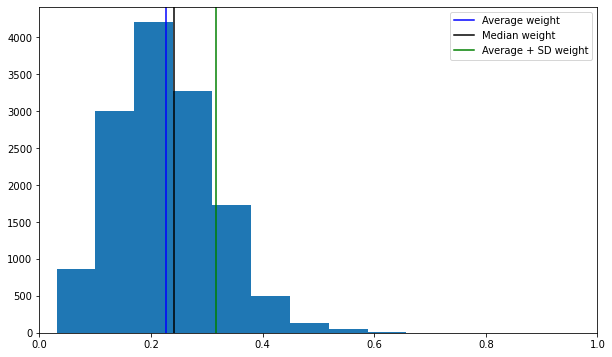

In [6]:
em.plot_distribution_of_all_weights()

Distribution-% of predicted scores:  [6.2549887526304335, 36.38342645671577, 36.477759233727596, 17.10325810899064, 3.062187069153182, 0.6603294390827952, 0.04353820477468979, 0.014512734924896598, 0.0, 0.0]


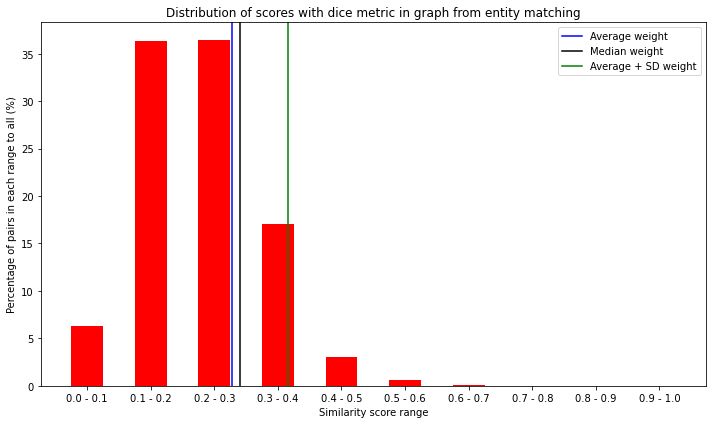

In [7]:
em.plot_distribution_of_scores()

In [8]:
from pyjedai.clustering import UniqueMappingClustering
umc = UniqueMappingClustering()
clusters = umc.process(pairs_graph, data)
umc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.0813 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     77.53% 
	Recall:        71.84%
	F1-score:      74.58%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 773
	False positives: 224
	True negatives: 1156397
	False negatives: 303
	Total comparisons: 997
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 77.53259779338015,
 'Recall %': 71.84014869888475,
 'F1 %': 74.57790641582248,
 'True Positives': 773,
 'False Positives': 224,
 'True Negatives': 1156397,
 'False Negatives': 303}

----

---

# Script with Optuna for fine-tuning tfidf



In [10]:
import time
import optuna
import os
import sys
import pandas as pd
from pyjedai.datamodel import Data
from pyjedai.workflow import compare_workflows
from pyjedai.block_building import StandardBlocking, QGramsBlocking, ExtendedQGramsBlocking, SuffixArraysBlocking, ExtendedSuffixArraysBlocking
from pyjedai.block_cleaning import BlockFiltering, BlockPurging
from pyjedai.comparison_cleaning import WeightedEdgePruning, WeightedNodePruning, CardinalityEdgePruning, CardinalityNodePruning, BLAST, ReciprocalCardinalityNodePruning, ReciprocalWeightedNodePruning, ComparisonPropagation
from pyjedai.matching import EntityMatching
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering
from optuna.study import MaxTrialsCallback
from optuna.trial import TrialState

db_name = "pyjedai_tfidf"
storage_name = "sqlite:///{}.db".format(db_name)

D1CSV = [
    "rest1.csv", "abt.csv", "amazon.csv", "dblp.csv",  "imdb.csv",  "imdb.csv",  "tmdb.csv",  "walmart.csv",   "dblp.csv",    "imdb.csv"
]
D2CSV = [
    "rest2.csv", "buy.csv", "gp.csv",     "acm.csv",   "tmdb.csv",  "tvdb.csv",  "tvdb.csv",  "amazon.csv",  "scholar.csv", "dbpedia.csv"
]
GTCSV = [
    "gt.csv",   "gt.csv",   "gt.csv",     "gt.csv",   "gt.csv", "gt.csv", "gt.csv", "gt.csv", "gt.csv", "gt.csv"
]
D = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9','D10']

separator = [
    '|', '|', '#', '\\%', '|', '|', '|', '|', '>', '|'
]
engine = [
    'python', 'python','python','python','python','python','python','python','python', None
]


for i in range(0,len(D1CSV)):
    print("\n\nDataset: ", D[i])

    d = D[i]
    d1 = D1CSV[i]
    d2 = D2CSV[i]
    gt = GTCSV[i]
    s = separator[i]
    e = engine[i]

    # Create a csv file 
    with open(d+'_tfidf_optuna_em.csv', 'w') as f:
        f.write('trial, metric, threshold, tokenizer, metric, qgram, precision, recall, f1, em_f1, runtime\n')
        data = Data(
            dataset_1=pd.read_csv("../data/ccer/" + d + "/" + d1 , 
                                sep=s,
                                engine=e,
                                na_filter=False).astype(str),
            id_column_name_1='id',
            dataset_2=pd.read_csv("../data/ccer/" + d + "/" + d2 , 
                                sep=s, 
                                engine=e, 
                                na_filter=False).astype(str),
            id_column_name_2='id',
            ground_truth=pd.read_csv("../data/ccer/" + d + "/gt.csv", sep=s, engine=e))

        if 'aggregated value' in data.attributes_1:
            data.dataset_1 = data.dataset_1.drop(columns=['aggregated value'], inplace=True)
        
        if 'aggregated value' in data.attributes_2:
            data.dataset_2 = data.dataset_2.drop(columns=['aggregated value'], inplace=True)

        title = d + "_tfidf_entity_matching"
        study_name = title  # Unique identifier of the study.

        '''
        OPTUNA objective function
        '''
        def objective(trial):
            try:
                t1 = time.time()
                sb = StandardBlocking()
                blocks = sb.build_blocks(data, tqdm_disable=False)

                cbbp = BlockPurging(smoothing_factor=1.0)
                blocks = cbbp.process(blocks, data, tqdm_disable=False)

                bf = BlockFiltering(ratio=0.8)
                blocks = bf.process(blocks, data, tqdm_disable=False)

                wep = CardinalityNodePruning(weighting_scheme='JS')
                candidate_pairs_blocks = wep.process(blocks, data, tqdm_disable=False)
                wep.evaluate(candidate_pairs_blocks)
                
                em = EntityMatching(metric = trial.suggest_categorical("metric", ["cosine", "jaccard", "dice"]),
                                    tokenizer = trial.suggest_categorical("tokenizer", ["char_tokenizer", "word_tokenizer"]), 
                                    vectorizer = 'tfidf',
                                    qgram = trial.suggest_int("qgram", 1, 5),
                                    similarity_threshold=0.0
                )
                pairs_graph = em.predict(candidate_pairs_blocks, data, tqdm_disable=False)
                em_results = em.evaluate(pairs_graph, data)
                
                thresholds = [em.get_weights_avg(), em.get_weights_median(), em.get_weights_avg()+em.get_weights_standard_deviation(), em.get_weights_median()+em.get_weights_standard_deviation()]
                
                ccc = UniqueMappingClustering()
                clusters = ccc.process(pairs_graph, data, similarity_threshold=trial.suggest_categorical("similarity_threshold", thresholds))

                results = ccc.evaluate(clusters, with_classification_report=True, verbose=True)

                t2 = time.time()
                f1, precision, recall = results['F1 %'], results['Precision %'], results['Recall %']

                f.write('{}, {}, {}, {}, {}, {},{}\n'.format(trial.number,
                                                             em.metric,
                                                             ccc.similarity_threshold,
                                                             em.tokenizer,
                                                             em.metric,
                                                             em.qgram,
                                                             precision,
                                                             recall,
                                                             f1,
                                                             em_results['F1 %'],
                                                             t2-t1))
            
                return f1

            except ValueError as e:
                # Handle the exception and force Optuna to continue
                
                print(e)
                trial.set_user_attr("failed", True)
                f.write('{}, {}, {}, {}, {}, {},{}\n'.format(trial.number, str(e), None, None,None,None, None, None, None, None, None))
                return optuna.TrialPruned()
        
        study_name = title  # Unique identifier of the study.
        num_of_trials = 1
        study = optuna.create_study(
            directions=["maximize"],
            study_name=study_name,
            storage=storage_name,
            load_if_exists=False
        )
        print("Optuna trials starting")
        study.optimize(
            objective, 
            n_trials=num_of_trials, 
            show_progress_bar=True,
            callbacks=[MaxTrialsCallback(num_of_trials, states=(TrialState.COMPLETE,))]
        )
        print("Optuna trials finished")

    f.close()